# Encoder-Decoder

#### Proposed in this research paper by Ilya sutskever: - The god behind OPENAI

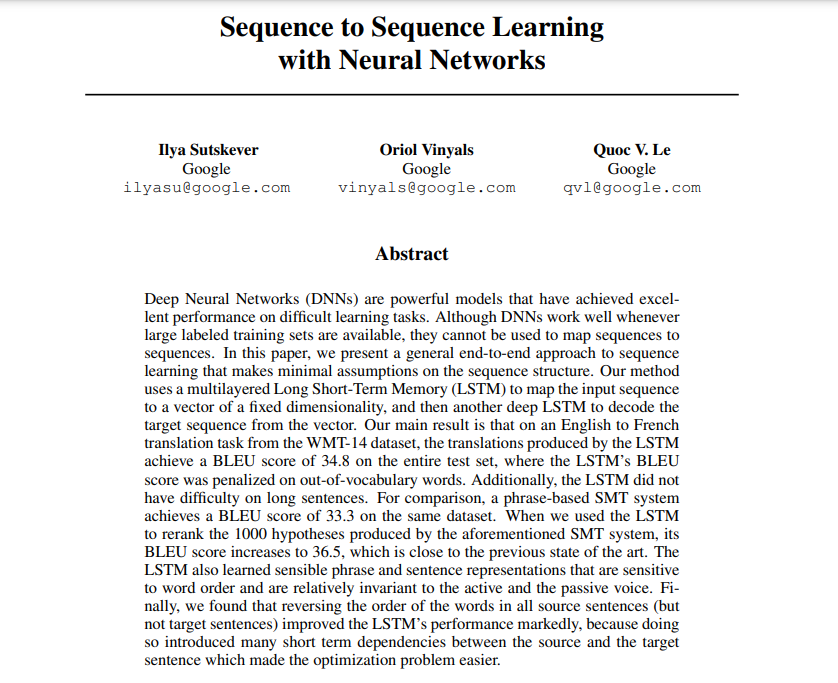

# High level overview of encoder-decoder

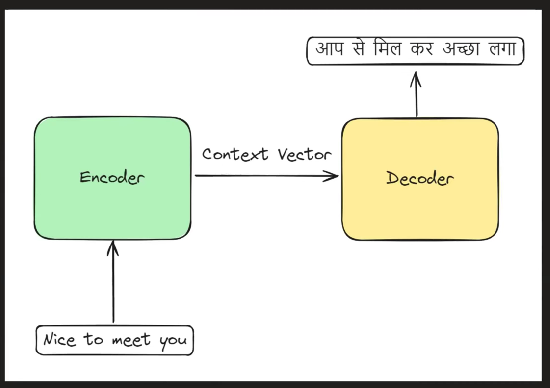

* encoder --> receive the input, understand the essence, give a `context vector`
* decoder --> receive the context vector, print the output word by word.

### Inside the Encoder - decoder

* Job is to process sequences
* So, we used LSTM, unfolded at different times.

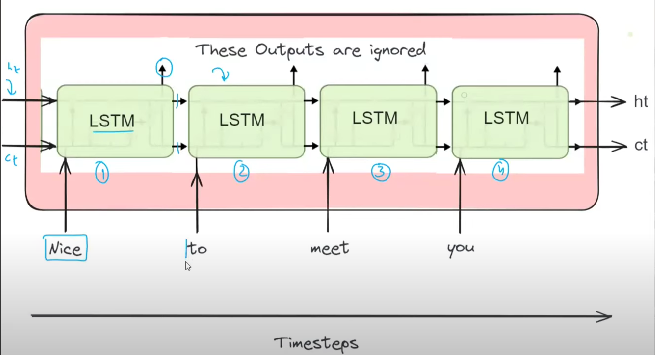

* Final $C_t$, $h_t$ go to the decoder.

* receive the output of encoder, with `<start>` to activate it to print output.

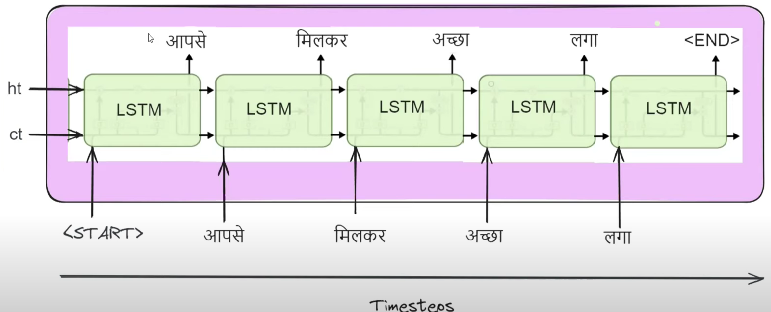

* Till decoder get `<end>`

## Training the encoder - decoder.

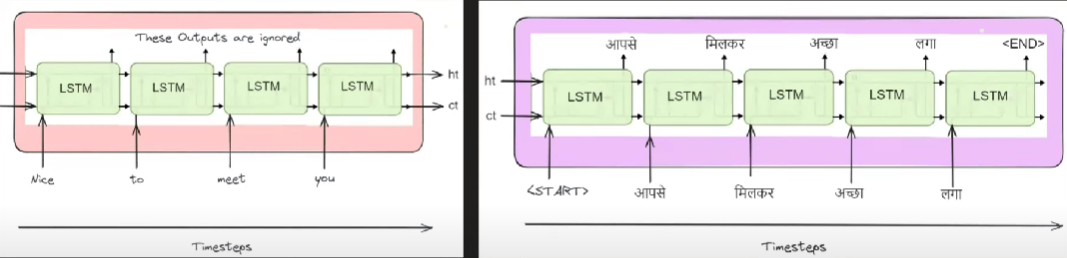

#### Dataset: - 

* We use supervised dataset, on `machine tranlation`.
* We have ENG - Hindi
  
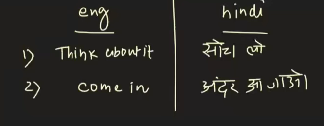

* Convert those input,output to vectors - > (encoding by OHE, rather advanced `Embedding` techinques)

* First we send vector `think`, at `t`, `about` at `t+1` and so on.
* Finally the $c_t$, $h_t$ is received to the decoder.
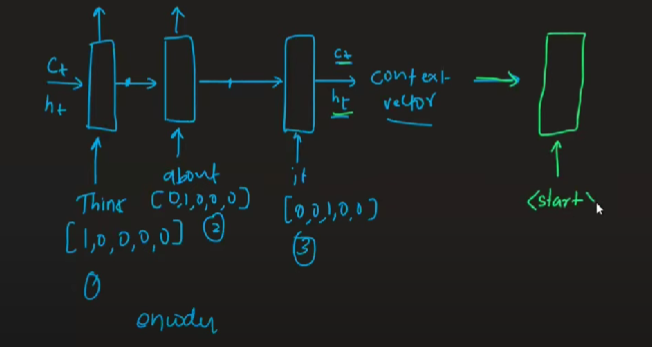


### Forward propagation:- 

* the LSTM of decoder, prints a vector, for that we add `softmax` layer to predict the prob of all the output word.
* Even if the output of the input word is wrong, we only send the correct output word to the next timestamp in the decoder.
* Eg. `think` --> `lo`, but still we send `soch` to `next timestamp`.
* Bcoz, we don't want to disturb the training time.
* Teacher forcing:- sending the correct output to the next timestamp of decoder even if the previous timestamp output is `wrong`.
* Keep doing till `<end>` output is given by the decoder.

### Back propagation:- 

* before feeding the next input sequence, we need to calculate the mistake by the model, so that we  can properly adjust the weigths and bias (trainable parameters)

* Suppose this is the `y_true` and `y_pred` of decoder at different `timestamp`.

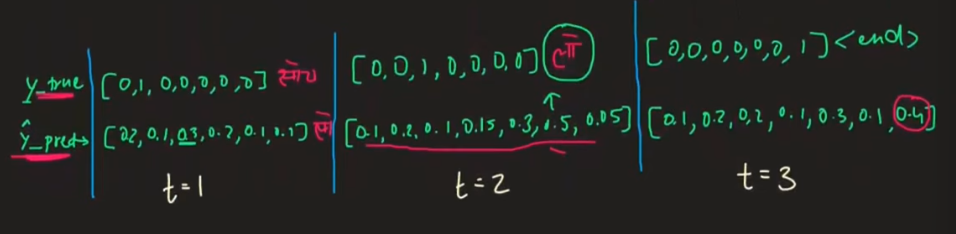

* we'll calculate the loss:- (categorical_crossentropy) - > multiclass problem.

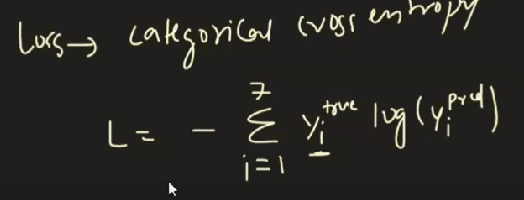

* find the loss for each timestamp and add/avg them.

* Now, we'll do backprogpagion, calculate the `gradient` of the Loss with all the trainable parameters.
* Gradients measure, which parameter did what mistake, so how much they need to be adjusted and in what in direction to reduce the loss.

* We do the same for all the input sequences till end of training document.

### Prediction:

* Now we've encoder decoder fully trained, weights and bias are properly set.
* We send the input vector for each word, at different timestamp.
* Finally $c_t$, $h_t$ context vector is received by the decoder.
* Decoder starts with `<start>`, and the softmax layer of each decoder timestamp gives the output.
* We select max prob word .. till `<end>`.
* Finally we get the output, may be right or wrong.

* In prediction, we don't adjust weights, of calculate loss., just do prediction

## Improvements:-

#### Embeddings:

* when the input dimensions of data is too large.
* Embedding is low level representation of data
* Embedding is `dense`, not too much `0s`.
* Same with the `decoder`.
* Can use `pre-trained` embeddings like `word2vec`, `glove`.
* Can use our own `embedding-layer` to train with our own data

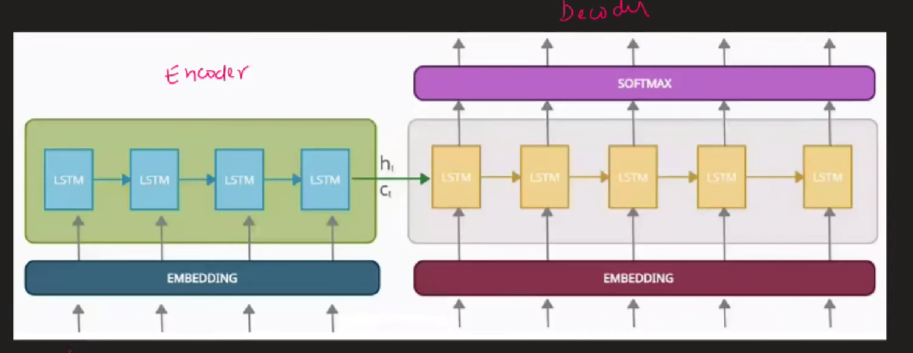

### Deep lSTMs

* to capture deep meanings in the doc
* Initial layers capture `word-level` meanign
* Middle ones capture `sentence level`, and so on.
* Top level on `paragraph` level.
* work well on `longer term dependencies` data.

### Reversing the Input:-

* we dont' reverse the output (meaning)
* to reduce the distance b/w words.
* used only when the initial word has greater context.

# Research Paper summary:

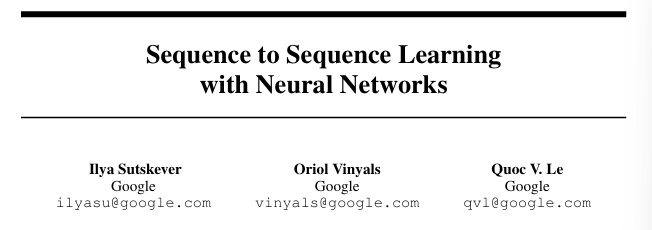

* Problem statement:- `Machine Translation (MT)`
## Introduction:-

* LSTMs ability to learn on data with long-range temporal dependencies.
* Reversing the input sequence in training and testing , key  contribution to the work.

## Model:-

* `RNNs` replaced by `LSTMs` to capture `long range dependencies.`
* LsTMs with `4` deep layers.
* Reverse the sequence before giving to the `encoder`.
* Thus $a$, $b$, $c$ -> $alpha$, $beta$, $gama$ became  $c$, $b$, $a$ -> $alpha$, $beta$, $gama$.
* Making $a$ closer to its `output`

## Dataset details:-

* Trained on a subset of `12M` sentences.
* English - Frech `machine translation`.
* publicly available data.
* Used fixed-vocab for each language
* English had `160,000` and `80,000` in french.
* Out-of-Vocabulary was replaced with `UNK` token.

## Decoding:- 

* objective function to minimize the loss:-
  
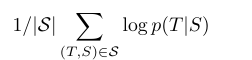

* `maximizing the log probability` using:

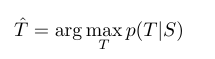


## Reversing the source sentence:-

* better results, since the shorter term dependencies greatly contributed.
* although the average distance was same.

## Training details:-

* Deep LSTMs with `4` layers.
* `1000` cells in each layer
* `1000` dimensional word embedding
* Input vocab size = `160,000` and ouput vocab size = `80,000`.
* Sofmax to decode the `80,000` output.
* Total `380M` parameters, `64M` were pure `recurrent` connections ( `32M` each for `encoder` and `decoder`)
* Rest might be in `fully connected-layers`

### Weight initialization:-
* uniform = [-0.08,0.08]
* stochastic gradient without momentum
* Fixed learning rate = `0.7`.
* After `5` epochs the `lr` halved  at each `0.5` epoch.
* batches of `128` sequences.
* Since most of the sequences in a batch were `short sentences` and only few `long sentences`, this lead to computational wastage in minibatch.
* So we they made all sentences in a `minibatch` roughly of `same lenght`.
* This speedup to `2X`.

## Parallelization:-

* Used `8-GPU` machine.
* Time = `10 days`




## Model analysis:-

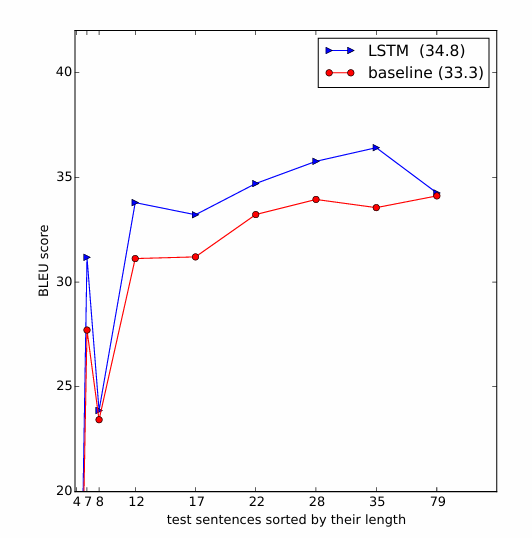


* Model performance as a function of `sentence length`.
* x-axis = text sentence sorted by length.
* y-axis = performance and its comparision with the existing `baseline` models.

#### conclusion:-
* Performance increased even on increasing the sentence length till `35` words.



* Model performace as function of most frequent words `ranking`.

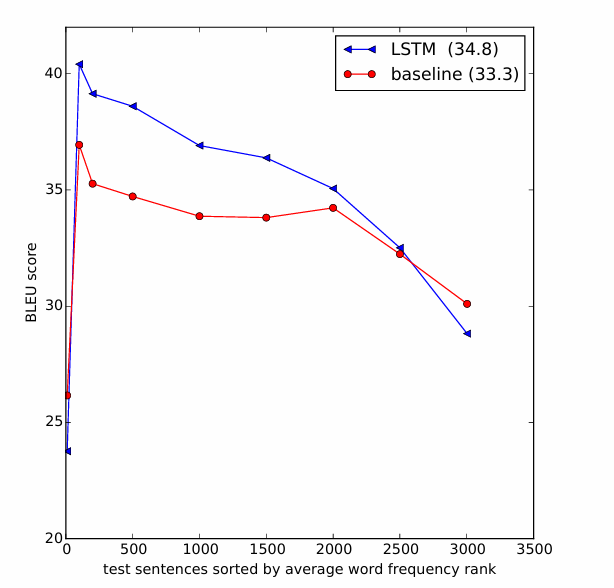

* For most frequent words, the performance is higher than `base line ` models.
* And it as reduced as the frequency of words reduced.

# conclusion:-

* `Deep LSTMs` with limited vocabulary can outperform a `standard` `SMT-` with unlimited vocabulary.
* Need of enogh training data
* Reversing the input word sequence in training and testing.
* LSTMs Didn't fail on longer sequences (as was expected initially)


### If you have a large big dataset
### And you train a deep large neural network
### Then success is guaranted !!!

### Presenation link of the authors:-

https://www.youtube.com/watch?v=-uyXE7dY5H0